In [2]:
import pandas as pd
import numpy as np

In [6]:
rng = np.random.default_rng(1)
A = rng.standard_normal((127, 5))
M = rng.choice([0, np.nan], p=[0.8, 0.2], size=A.shape)
A += M
D =  pd.DataFrame(A, columns=['food','bar','pickle','snack','popcorn'])

A[:3]

array([[ 0.34558419,  0.82161814,  0.33043708, -1.30315723,         nan],
       [        nan, -0.53695324,  0.5811181 ,  0.3645724 ,  0.2941325 ],
       [        nan,  0.54671299,         nan, -0.16290995, -0.48211931]])

In [8]:
D.columns

Index(['food', 'bar', 'pickle', 'snack', 'popcorn'], dtype='object')

In [10]:
D.head()

,food,bar,pickle,snack,popcorn
0,0.345584,0.821618,0.330437,-1.303157,NaN
1,NaN,-0.536953,0.581118,0.364572,0.294132
2,NaN,0.546713,NaN,-0.162910,-0.482119
3,0.598846,NaN,NaN,-0.781908,NaN
4,0.008142,-0.275603,1.294064,NaN,-2.711162


In [20]:
for col in D.columns:
    print('Column "{0}" has {1:.2%} missing values'.format(col, np.isnan(D[col]).mean()))

Column "food" has 16.54% missing values
Column "bar" has 25.98% missing values
Column "pickle" has 29.13% missing values
Column "snack" has 21.26% missing values
Column "popcorn" has 22.83% missing values


In [25]:
from matplotlib.pyplot import subplots
Auto = pd.read_csv("Auto.csv")

Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


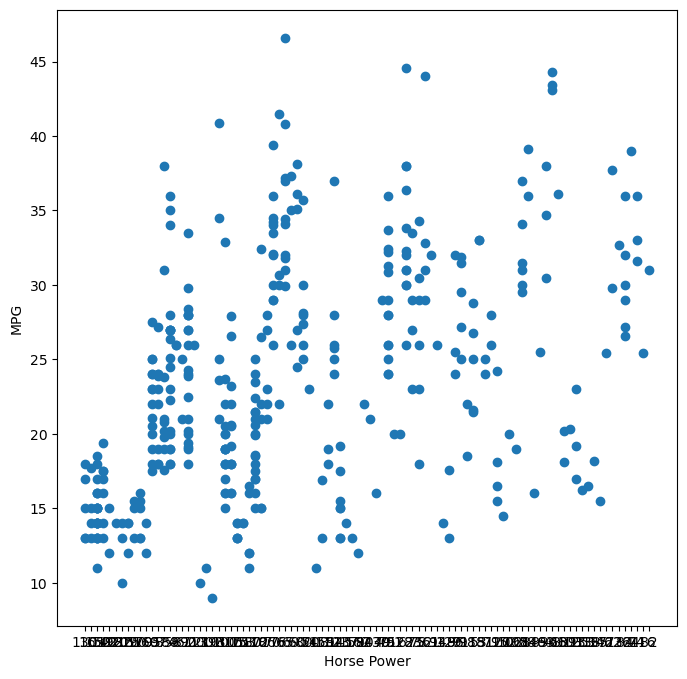

In [31]:
fig, ax = subplots(figsize=(8, 8))

ax.plot(Auto['horsepower'], Auto['mpg'], 'o')
ax.set_xlabel('Horse Power')
ax.set_ylabel('MPG');

Text(0.5, 1.0, 'Horsepower Vs. Mpg')

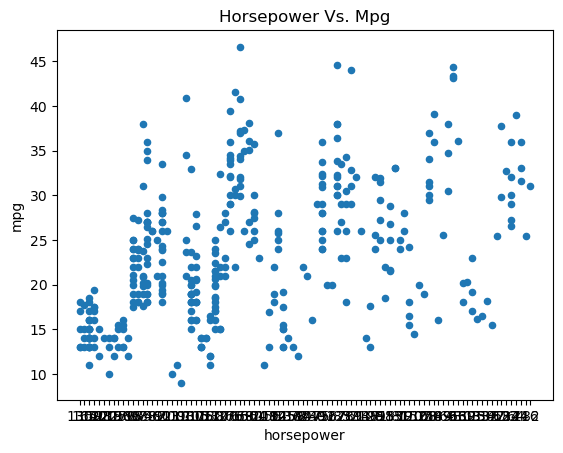

In [33]:
ax = Auto.plot.scatter('horsepower', 'mpg')
ax.set_title('Horsepower Vs. Mpg')

<Axes: xlabel='horsepower', ylabel='mpg'>

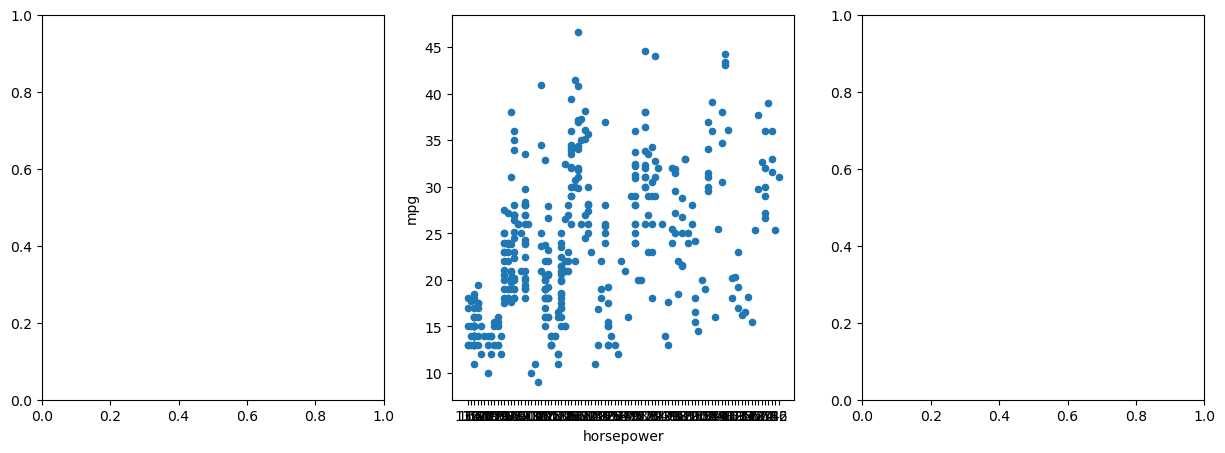

In [35]:
fig, axes = subplots(ncols=3, figsize=(15, 5))
Auto.plot.scatter('horsepower', 'mpg', ax=axes[1])

In [37]:
Auto.horsepower

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 397, dtype: object

In [41]:
Auto.cylinders.dtype

dtype('int64')

In [43]:
Auto.cylinders = pd.Series(Auto.cylinders, dtype='category')
Auto.cylinders.dtype

CategoricalDtype(categories=[3, 4, 5, 6, 8], ordered=False, categories_dtype=int64)

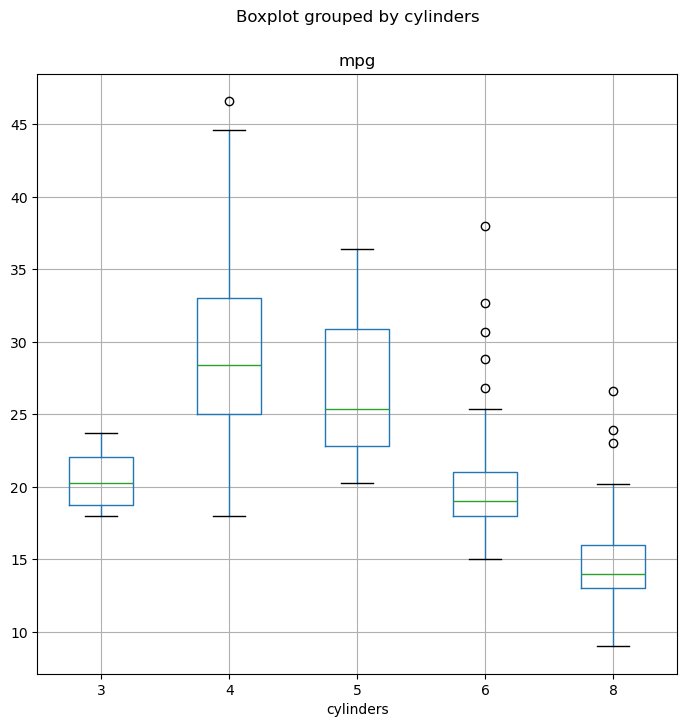

In [49]:
fig, ax = subplots(figsize=(8,8))
Auto.boxplot('mpg', by='cylinders', ax=ax);

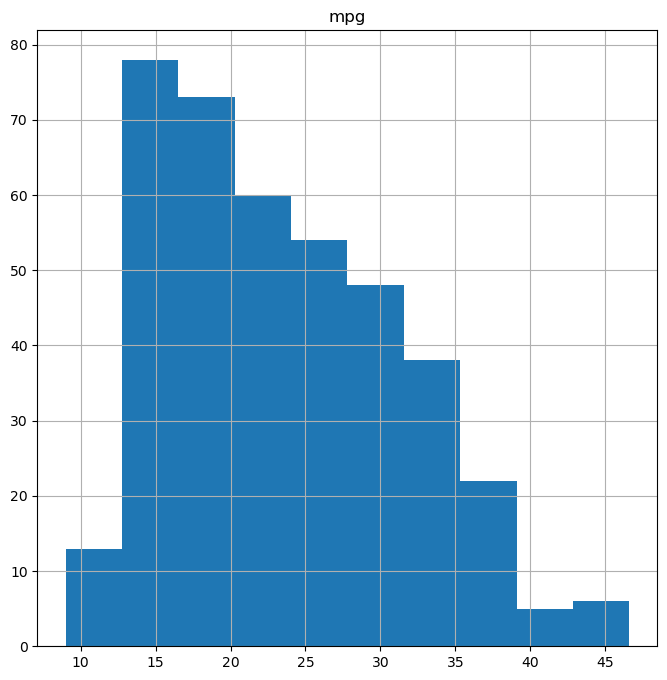

In [53]:
fig, ax = subplots(figsize=(8, 8))
Auto.hist('mpg', ax=ax);

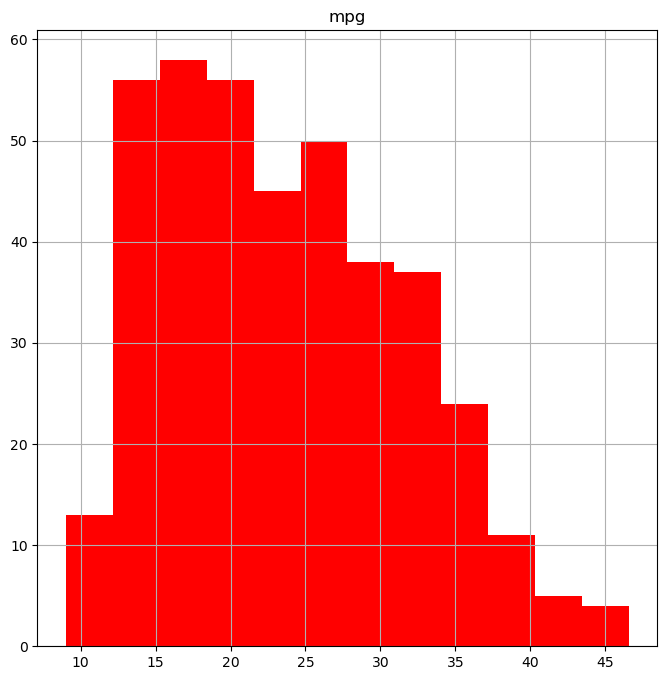

In [55]:
fig, ax = subplots(figsize=(8, 8))
Auto.hist('mpg', color='red', bins=12, ax=ax);

In [57]:
Auto.hist?

Signature:
Auto.hist(
    column: 'IndexLabel | None' = None,
    by=None,
    grid: 'bool' = True,
    xlabelsize: 'int | None' = None,
    xrot: 'float | None' = None,
    ylabelsize: 'int | None' = None,
    yrot: 'float | None' = None,
    ax=None,
    sharex: 'bool' = False,
    sharey: 'bool' = False,
    figsize: 'tuple[int, int] | None' = None,
    layout: 'tuple[int, int] | None' = None,
    bins: 'int | Sequence[int]' = 10,
    backend: 'str | None' = None,
    legend: 'bool' = False,
    **kwargs,
)
Docstring:
Make a histogram of the DataFrame's columns.

A `histogram`_ is a representation of the distribution of data.
This function calls :meth:`matplotlib.pyplot.hist`, on each series in
the DataFrame, resulting in one histogram per column.

.. _histogram: https://en.wikipedia.org/wiki/Histogram

Parameters
----------
data : DataFrame
    The pandas object holding the data.
column : str or sequence, optional
    If passed, will be used to limit data to a subset of columns.
by

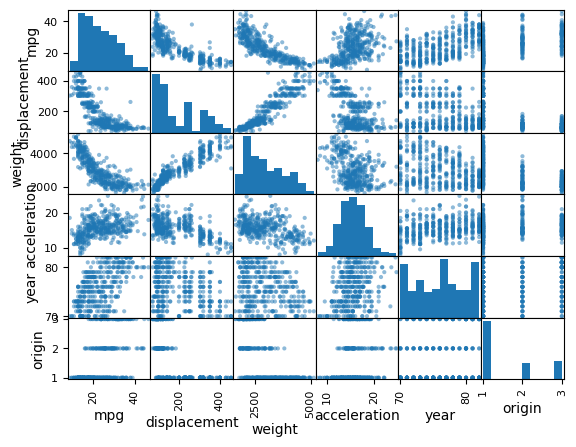

In [61]:
pd.plotting.scatter_matrix(Auto);

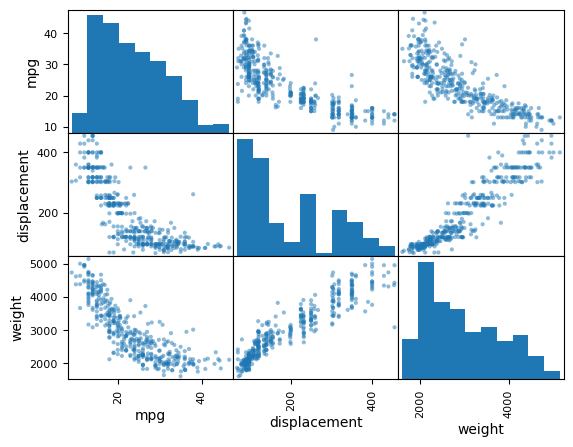

In [63]:
pd.plotting.scatter_matrix(Auto[['mpg','displacement','weight']]);

In [67]:
Auto[['mpg','weight']].describe()

,mpg,weight
count,397.000000,397.000000
mean,23.515869,2970.261965
std,7.825804,847.904119
min,9.000000,1613.000000
25%,17.500000,2223.000000
50%,23.000000,2800.000000
75%,29.000000,3609.000000
max,46.600000,5140.000000


In [69]:
Auto.describe()

,mpg,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,455.000000,5140.000000,24.800000,82.000000,3.000000
